In [70]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_swiss_roll

Let's test our LE algorithms on the swiss roll dataset. We first load the data.

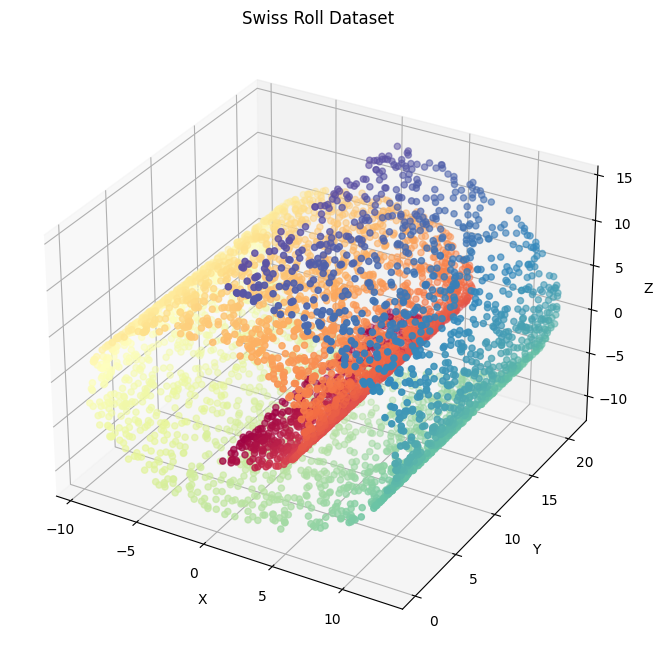

In [98]:
n_samples = 5000
X, color = make_swiss_roll(n_samples)

# Plot the Swiss Roll in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

# Set plot labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Swiss Roll Dataset')

# Show the plot
plt.show()

Our laplacian eigenmaps functions, namely laplacian_eigenmaps, avg_laplacian_eigenmaps, var_radius_std_laplacian_eigenmaps and var_radius_laplacian_eigenmaps are loaded from a separate file. More details about these eigenmaps functions can be found in the paper and in laplacian_eigenmaps_functions.ipynb

In [104]:
%run /Users/lucastucker/REU-2023/laplacian_eigenmaps_functions.ipynb

We start by performing a standard laplacian eigenmaps algorithm from 3d to 2d on the data.

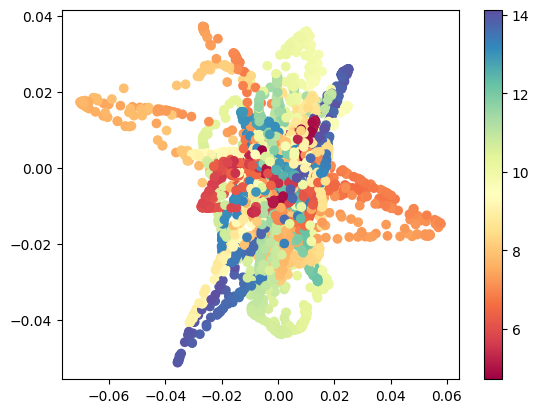

In [99]:
k = 2
sigma = 2
t = 10

P = laplacian_eigenmaps(X, k, t, sigma=sigma)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=color, cmap=plt.cm.Spectral)
fig.colorbar(sc)

plt.show()

As we can see, the manifold appears improperly unravelled. Let's try keeping the standard LE algorithm but now varying the "radius" of points. In particular, the LE weight matrix will only include r nearest neighbors for every point, where r (the radius) is increased if the point is in a denser area, and decreased if it is in a sparser area. 

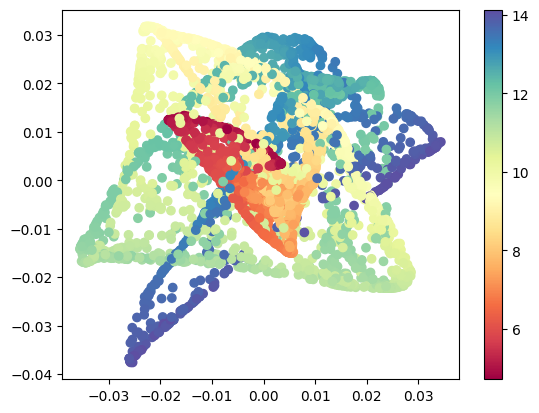

In [105]:
k = 2
t = 18

P = var_radius_std_laplacian_eigenmaps(X, k, t)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=color, cmap=plt.cm.Spectral)
fig.colorbar(sc)

plt.show()

The dimension reduction appears more successful, with the color gradients relatively maintained. We will now implement the "averaged" LE proposed by Wang et. al. 

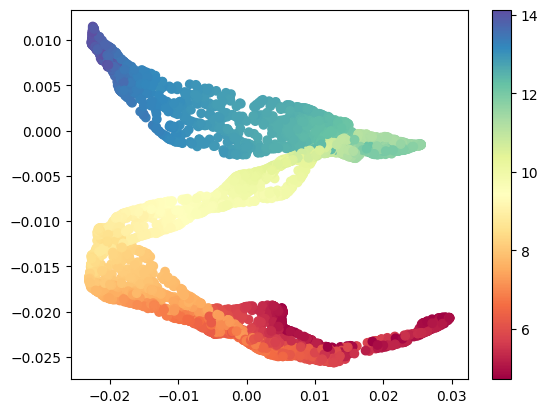

In [107]:
# Example usage
k = 2
t = 20

P = avg_laplacian_eigenmaps(X, k, t)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=color, cmap=plt.cm.Spectral)
fig.colorbar(sc)

plt.show()

This color gradient is clearer, but there is still overlap of points. Finally, we add the variable radius capability on top of the "averaged LE" algorithm proposed by Wang et. al. in a novel LE algorithm shown below. 

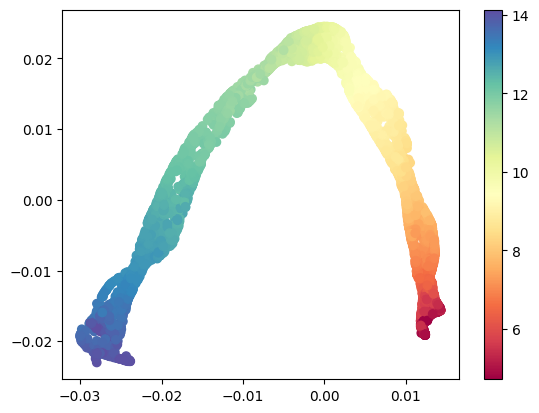

In [106]:
k = 2
t = 18

P = var_radius_laplacian_eigenmaps(X, k, t)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=color, cmap=plt.cm.Spectral)
fig.colorbar(sc)

plt.show()

In this example, the color gradient is clear and there is little to no overlap.

We now experiment with a helix dataset.  

In [62]:
m = 1500 # number of points
n = 3 # representation dimension

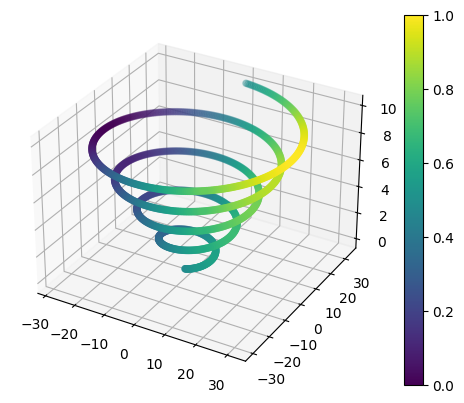

In [63]:
theta = np.linspace(1.5 * np.pi, 10.5 * np.pi, m) # 1.5 to 4.5 default
r = np.linspace(0, 10, m)
x = theta * np.cos(theta)
z = r
y = theta * np.sin(theta)
# fig = plt.figure()
gradient_colors = x

# Normalize the gradient_colors to be between 0 and 1
min_color = np.min(gradient_colors)
max_color = np.max(gradient_colors)
normalized_colors = (gradient_colors - min_color) / (max_color - min_color)

# Create a colormap
colormap = cm.viridis

# Create an interpolated color gradient based on the normalized_colors
interpolated_colors = colormap(normalized_colors)

# Plot the original data points in 3D with the interpolated color gradient
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=interpolated_colors)
fig.colorbar(sc)
plt.show()

In [64]:
X = np.vstack((x, y, z)).T
X.shape

(1500, 3)

Let's perform standard LE on the dataset.

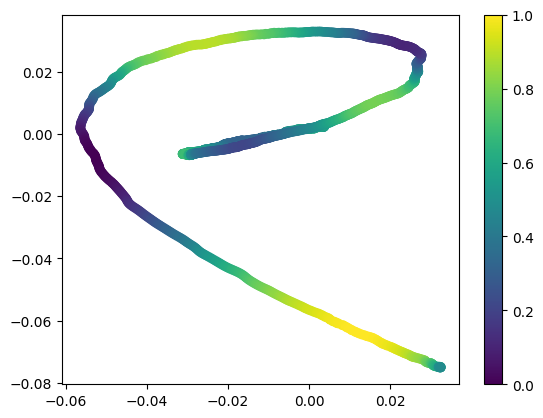

In [66]:
k = 2
sigma = 2
t = 10

P = laplacian_eigenmaps(X, k, t, sigma=sigma)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=interpolated_colors) #, cmap=colormap, marker='o')
fig.colorbar(sc)

plt.show()

The reduction is decent, but there is some overlap near the end. We now experiment with the "averaged LE" version proposed by Wang et. al.

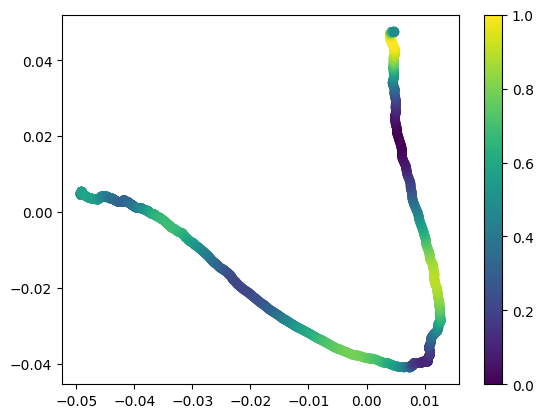

In [68]:
k = 2
t = 10

P = avg_laplacian_eigenmaps(X, k, t)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=interpolated_colors) #, cmap=colormap, marker='o')
fig.colorbar(sc)

plt.show()

Finally, we test the variable radius LE which builds on the previous "averaged LE"

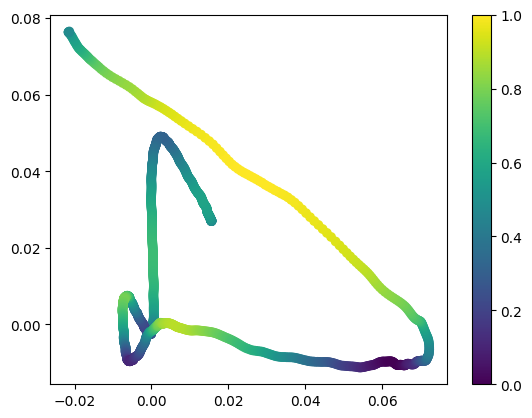

In [69]:
k = 2
sigma = 2
t = 18

P = var_radius_laplacian_eigenmaps(X, k, t)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=interpolated_colors) #, cmap=colormap, marker='o')
fig.colorbar(sc)

plt.show()